In [1]:
import sys
sys.path.append("../")

In [2]:
from src.nnsrc.dense import NeuralNetwork

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [4]:
from matplotlib.pyplot import plot, legend

In [36]:
data = pd.read_csv('../src/data/classification/data.simple.train.100.csv')
X = data[["x", "y"]].values
Y = data["cls"].values.reshape(-1,1)

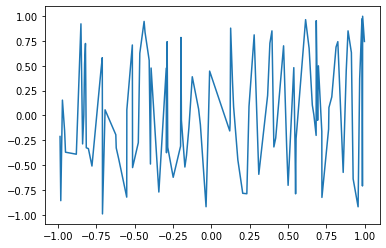

In [31]:
plot(*zip(*sorted(zip(data.x, data.y))))

In [48]:
def train(X, Y, scale_x=False, scale_y=False, n_layers=4,
                    n_neurons_per_layer=[2, 50, 50, 1], act_funcs=['sigmoid','sigmoid', 'sigmoid', 'sigmoid'],
                    bias=True, problem='classification'):
    X = X.copy()
    Y = Y.copy()
    X_train_scaler = MinMaxScaler((0,1))
    Y_train_scaler = MinMaxScaler((0,1))
    if scale_x:
        X = X_train_scaler.fit_transform(X)
    if scale_y:
        Y = Y_train_scaler.fit_transform(Y)
        
    nn2 = NeuralNetwork(seed=1, n_layers=n_layers,
                    n_neurons_per_layer=n_neurons_per_layer, act_funcs=act_funcs,
                    bias=bias, problem=problem)

    for layer in nn2.layers:
        print(layer.name, layer.input_dim, layer.output_dim)
    history = nn2.train(X.T, Y.T, 1000, 0.3)
    plot(list(zip(*history))[1])
    
    y_hat, cache = nn2.predict(X.T)
    if scale_y:
        y_hat = Y_train_scaler.inverse_transform(y_hat).reshape(-1,1)
        #y_hat = MinMaxScaler().fit_transform(y_hat.reshape(-1,1))
        
    #data['y_predicted'] = y_hat
    
    #plot(*zip(*sorted(zip(data.x, data.y))), label='data')
    #plot(*zip(*sorted(zip(data.x, data.y_predicted))), label='pred')
    #legend()
    print(1 - np.linalg.norm(y_hat - y_normed)/(np.linalg.norm(y_normed.mean()-y_normed)))

Dense_0 2 2
Dense_1 2 50
Dense_2 50 50
Dense_3 50 1
nan


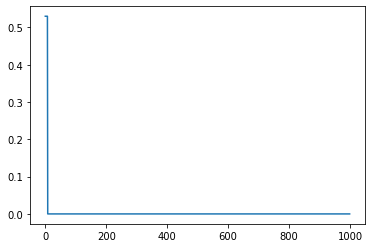

In [49]:
train(X, Y)

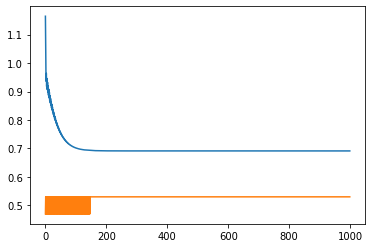

In [19]:
plot(history)

In [20]:
history[-1]

(array(0.69130572), 0.53)

0.3201803645284368


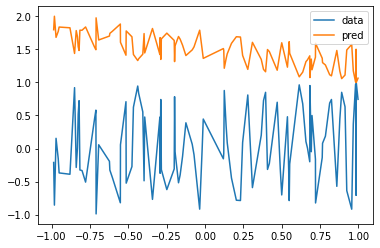

In [24]:
y_hat, cache = nn2.predict(X_normed.T)
y_hat = MinMaxScaler().fit_transform(y_hat.reshape(-1,1))
data['y_predicted'] = Y_train_scaler.inverse_transform(y_hat.reshape(-1,1))
plot(*zip(*sorted(zip(data.x, data.y))), label='data')
plot(*zip(*sorted(zip(data.x, data.y_predicted))), label='pred')
legend()
print(1 - np.linalg.norm(y_hat - y_normed)/(np.linalg.norm(y_normed.mean()-y_normed)))

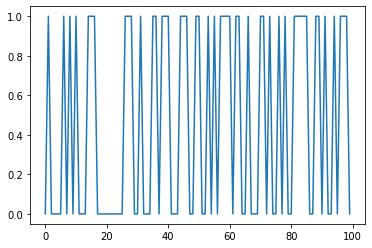

In [25]:
plot(y_normed)

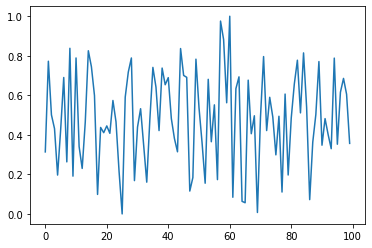

In [27]:
plot(y_hat)

In [17]:
## TEST ##

In [18]:
data = pd.read_csv('../src/data/regression/data.activation.test.100.csv')
X2 = data[["x"]].values
y2 = data['y'].values.reshape(-1,1)

#X2 = X_train_scaler.transform(X2)
y2 = Y_train_scaler.transform(y2)

y_hat2 = nn2.predict(X2.T)
y_hat2 = MinMaxScaler().fit_transform(y_hat2.reshape(-1,1))

print(1 - np.linalg.norm(y_hat2 - y2)/(np.linalg.norm(y2.mean()-y2)))

AttributeError: 'tuple' object has no attribute 'reshape'

In [ ]:
data['y_predicted'] = Y_train_scaler.inverse_transform(y_hat2)

In [ ]:
plot(*zip(*sorted(zip(data.x, data.y))), label='data')
plot(*zip(*sorted(zip(data.x, data.y_predicted))), label='pred')
legend()